In [1]:
!pip install pytrends
from pytrends.request import TrendReq

# Connect to Google Trends
pytrends = TrendReq()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


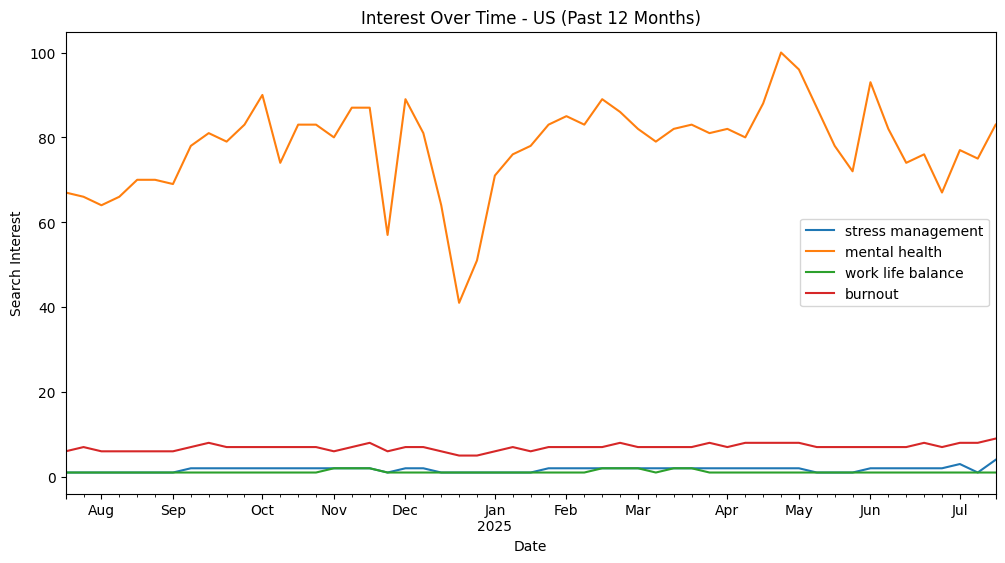

,stress management,mental health,work life balance,burnout
date,,,,
2025-06-22,2,76,1,8
2025-06-29,2,67,1,7
2025-07-06,3,77,1,8
2025-07-13,1,75,1,8
2025-07-20,4,83,1,9


In [5]:
#Visualization
import matplotlib.pyplot as plt

# Topics
kw_list = ["stress management", "mental health", "work life balance", "burnout"]

#Interest over time for the past 12 months in the US
pytrends.build_payload(kw_list, timeframe='today 12-m', geo='US')

interest_over_time_df = pytrends.interest_over_time()


interest_over_time_df = interest_over_time_df.drop(columns=['isPartial'])

# Plot trends
interest_over_time_df.plot(figsize=(12,6))
plt.title("Interest Over Time - US (Past 12 Months)")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.show()

interest_over_time_df.tail()


In [7]:
# Interest by region (state-level for US)
region_interest = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)

# Sort by top state interest
print(region_interest.sort_values("mental health", ascending=False).head(10))



                stress management  mental health  work life balance  burnout
geoName                                                                     
Minnesota                       1             93                  1        5
Iowa                            1             91                  1        7
Colorado                        1             91                  1        7
Oklahoma                        1             91                  1        7
South Carolina                  2             91                  1        6
Tennessee                       1             91                  1        7
Wyoming                         1             91                  1        7
New Hampshire                   1             91                  1        7
Mississippi                     2             91                  1        6
Maryland                        1             91                  1        7


Python NLP based Scrapping of Keywords

In [16]:
!pip install praw

import praw
import pandas as pd

# Reddit API instance
reddit = praw.Reddit(
    client_id="OKrLKhWQz9Xb_JWnhmJg6A",
    client_secret="NrkpVeqgE012YMgfrG5Bvi8r8L1z1w",
    user_agent="trend-analysis-script by /u/Sathvika"
)

# ✅ Test if authentication works
print("API Authenticated?", reddit.read_only)  # Should print True


# ✅ List of relevant subreddits for women & stress
subreddits_to_scrape = ["AskWomen", "TwoXChromosomes", "mentalhealth", "burnout", "relationships"]

posts = []

# ✅ Loop through each subreddit
for sub_name in subreddits_to_scrape:
    print(f"Scraping r/{sub_name}...")
    subreddit = reddit.subreddit(sub_name)
    for post in subreddit.hot(limit=20):  # scrape 20 posts per subreddit
        posts.append({
            "subreddit": sub_name,
            "title": post.title,
            "text": post.selftext
        })

# ✅ Create DataFrame
df = pd.DataFrame(posts)
print(f"\n✅ Total posts scraped: {len(df)}")
df.head()

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



API Authenticated? True
Scraping r/AskWomen...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping r/TwoXChromosomes...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping r/mentalhealth...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping r/burnout...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Scraping r/relationships...

✅ Total posts scraped: 100


,subreddit,title,text
0,AskWomen,What insight or attitude has significantly imp...,
1,AskWomen,What small purchase had a significant impact i...,
2,AskWomen,"Which things are considered as ""ladylike"" or ""...",
3,AskWomen,What helped you be less insecure when surround...,
4,AskWomen,If you could only have one for the rest of you...,


In [17]:
all_text = " ".join(df["title"].tolist()) + " " + " ".join(df["text"].tolist())
print(all_text[:500])  # Just to preview first 500 chars


What insight or attitude has significantly improved your sex life? What small purchase had a significant impact in your life? Which things are considered as "ladylike" or "feminine", but is super inefficient and harmful for women? What helped you be less insecure when surrounded by other women? If you could only have one for the rest of your life, which are you choosing: mind-blowing sex or soul-melting cuddles? Why? What do you appreciate about your partner/BF/GF? What’s one thing you stopped d


In [18]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy
from collections import Counter

nlp = spacy.load("en_core_web_sm")

# Process text
doc = nlp(all_text)

# Extract only meaningful keywords (nouns & adjectives)
keywords = [token.text.lower() for token in doc
            if token.pos_ in ["NOUN", "ADJ"] and len(token.text) > 3]

# Count most common keywords
top_keywords = Counter(keywords).most_common(20)
print("Top 20 Keywords:\n", top_keywords)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Top 20 Keywords:
 [('time', 63), ('relationship', 51), ('things', 45), ('friends', 45), ('years', 36), ('other', 35), ('people', 34), ('game', 31), ('life', 26), ('good', 26), ('months', 26), ('women', 22), ('more', 22), ('many', 22), ('person', 21), ('family', 20), ('last', 20), ('partner', 19), ('boyfriend', 19), ('little', 19)]


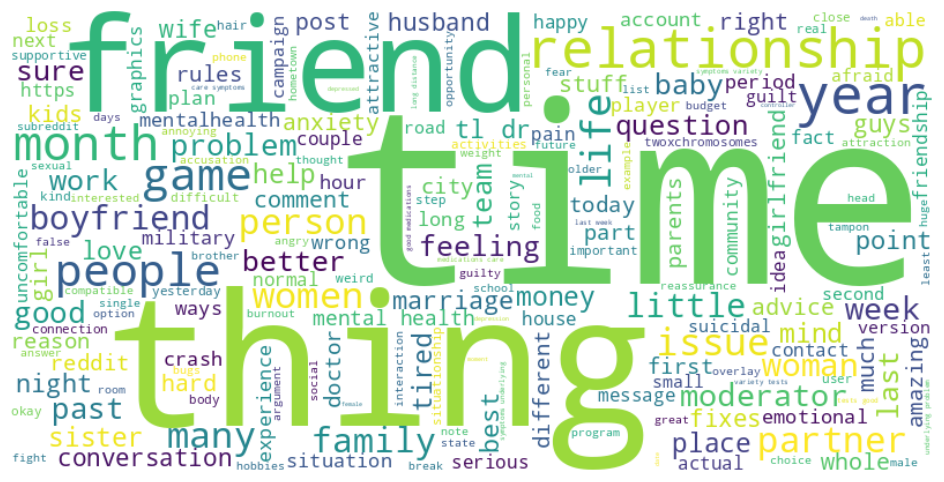

In [19]:
!pip install wordcloud matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(keywords))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [20]:
!pip install textblob
from textblob import TextBlob

df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[["title", "sentiment"]].head())


                                               title  sentiment
0  What insight or attitude has significantly imp...        0.0
1  What small purchase had a significant impact i...        0.0
2  Which things are considered as "ladylike" or "...        0.0
3  What helped you be less insecure when surround...        0.0
4  If you could only have one for the rest of you...        0.0
